# here we will now visualize all four data

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

CHEAPCARSdf = pd.read_csv('cheapcars.csv')
CHEAPCARS = CHEAPCARSdf.to_numpy()
BUDGETCARSdf = pd.read_csv('budgetcars.csv')
BUDGETCARS = BUDGETCARSdf.to_numpy()
MIDRANGECARSdf = pd.read_csv('midrangecars.csv')
MIDRANGECARS = MIDRANGECARSdf.to_numpy()
LUXURYCARSdf = pd.read_csv('luxurycars.csv')
LUXURYCARS = LUXURYCARSdf.to_numpy()
ALLCARS = np.concatenate((CHEAPCARS, BUDGETCARS, MIDRANGECARS, LUXURYCARS))
ALLCARS_df = pd.DataFrame(ALLCARS, columns=['age', 'brand', 'kmdriven', 'fuelType', 'bodyType', 'seatCap', 'transmission', 'owners', 'price', 'category'])

let's visualise mean and median price of each of the 4 data sets (cheapcars, budgetcars, midrangecars, luxurycars)

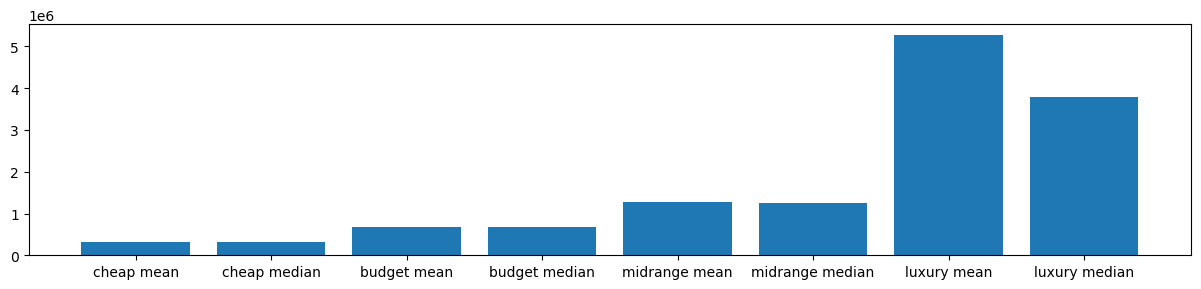

In [3]:
plt.figure(figsize=(15,3))
plt.bar(['cheap mean', 'cheap median', 'budget mean', 'budget median', 'midrange mean', 'midrange median', 'luxury mean', 'luxury median'], [np.mean(CHEAPCARS[:, 8]), np.median(CHEAPCARS[:, 8]), np.mean(BUDGETCARS[:, 8]), np.median(BUDGETCARS[:, 8]), np.mean(MIDRANGECARS[:, 8]), np.median(MIDRANGECARS[:, 8]), np.mean(LUXURYCARS[:, 8]), np.median(LUXURYCARS[:, 8])])
plt.show()

now let's see how the data is ditributed among cheap, budget, midrange and luxury cars.

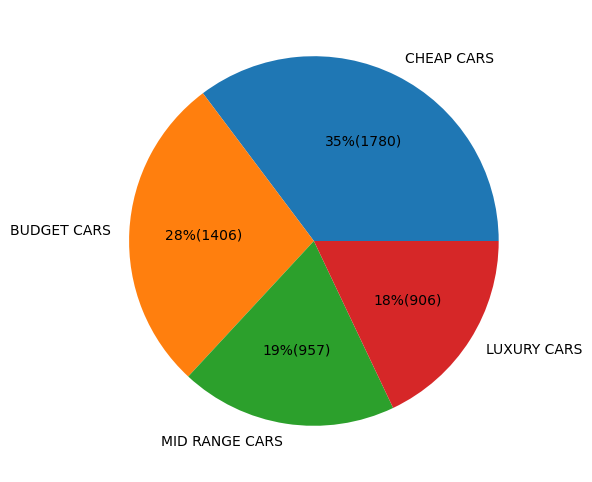

In [4]:
total = len(CHEAPCARS) + len(BUDGETCARS) + len(MIDRANGECARS) + len(LUXURYCARS)

plt.figure(figsize=(6, 6))
plt.pie(
    [len(CHEAPCARS), len(BUDGETCARS), len(MIDRANGECARS), len(LUXURYCARS)],
    labels=['CHEAP CARS', 'BUDGET CARS', 'MID RANGE CARS', 'LUXURY CARS'],
    autopct=lambda p: '{:.0f}%({:.0f})'.format(p, (p/100)*total)
)
plt.show()

## Frequency of cars of different prices

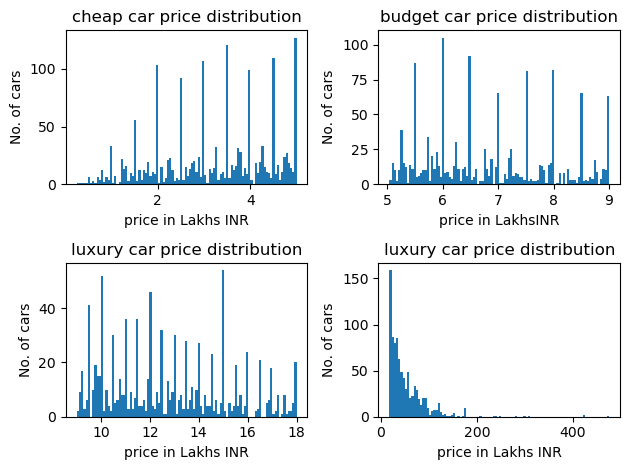

In [5]:
fig, axes = plt.subplots(2,2)

axes[0,0].hist(CHEAPCARS[:, -2]/100000, bins=100)
axes[0,0].set_ylabel('No. of cars')
axes[0,0].set_xlabel('price in Lakhs INR')
axes[0,0].set_title('cheap car price distribution')

axes[0,1].hist(BUDGETCARS[:, -2]/100000, bins=100)
axes[0,1].set_ylabel('No. of cars')
axes[0,1].set_xlabel('price in LakhsINR')
axes[0,1].set_title('budget car price distribution')

axes[1,0].hist(MIDRANGECARS[:, -2]/100000, bins=100)
axes[1,0].set_ylabel('No. of cars')
axes[1,0].set_xlabel('price in Lakhs INR')
axes[1,0].set_title('luxury car price distribution')

axes[1,1].hist(LUXURYCARS[:, -2]/100000, bins=100)
axes[1,1].set_ylabel('No. of cars')
axes[1,1].set_xlabel('price in Lakhs INR')
axes[1,1].set_title('luxury car price distribution')

fig.tight_layout()
plt.show()

## Box plot to find outliers

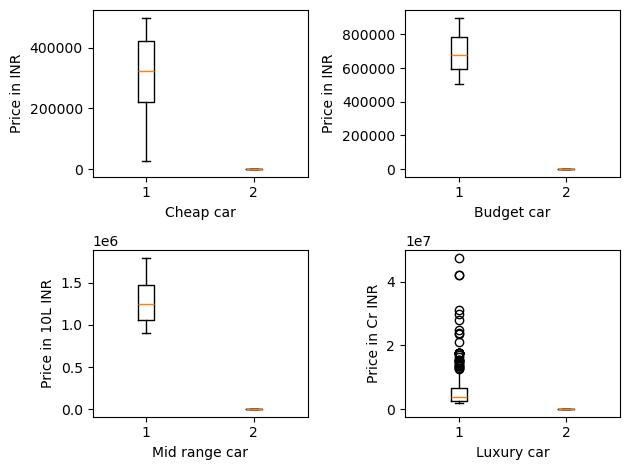

In [25]:
figg, indexx = plt.subplots(2,2)
indexx[0,0].boxplot(x=CHEAPCARS[:, -2:])
indexx[0,0].set_xlabel('Cheap car')
indexx[0,0].set_ylabel('Price in INR')

indexx[0,1].boxplot(x=BUDGETCARS[:, -2:])
indexx[0,1].set_xlabel('Budget car')
indexx[0,1].set_ylabel('Price in INR')

indexx[1,0].boxplot(x=MIDRANGECARS[:, -2:])
indexx[1,0].set_xlabel('Mid range car')
indexx[1,0].set_ylabel('Price in 10L INR')

indexx[1,1].boxplot(x=LUXURYCARS[:, -2:])
indexx[1,1].set_xlabel('Luxury car')
indexx[1,1].set_ylabel('Price in Cr INR')


figg.tight_layout()
plt.show()

so, luxury cars' data has a lot of outliers - as expeccted

## Pair plots
let's try to visualize the relationship between pairs of columns

**Categories: 0=cheap cars, 1=budget cars, 2=mid range cars, 3=luxury cars**

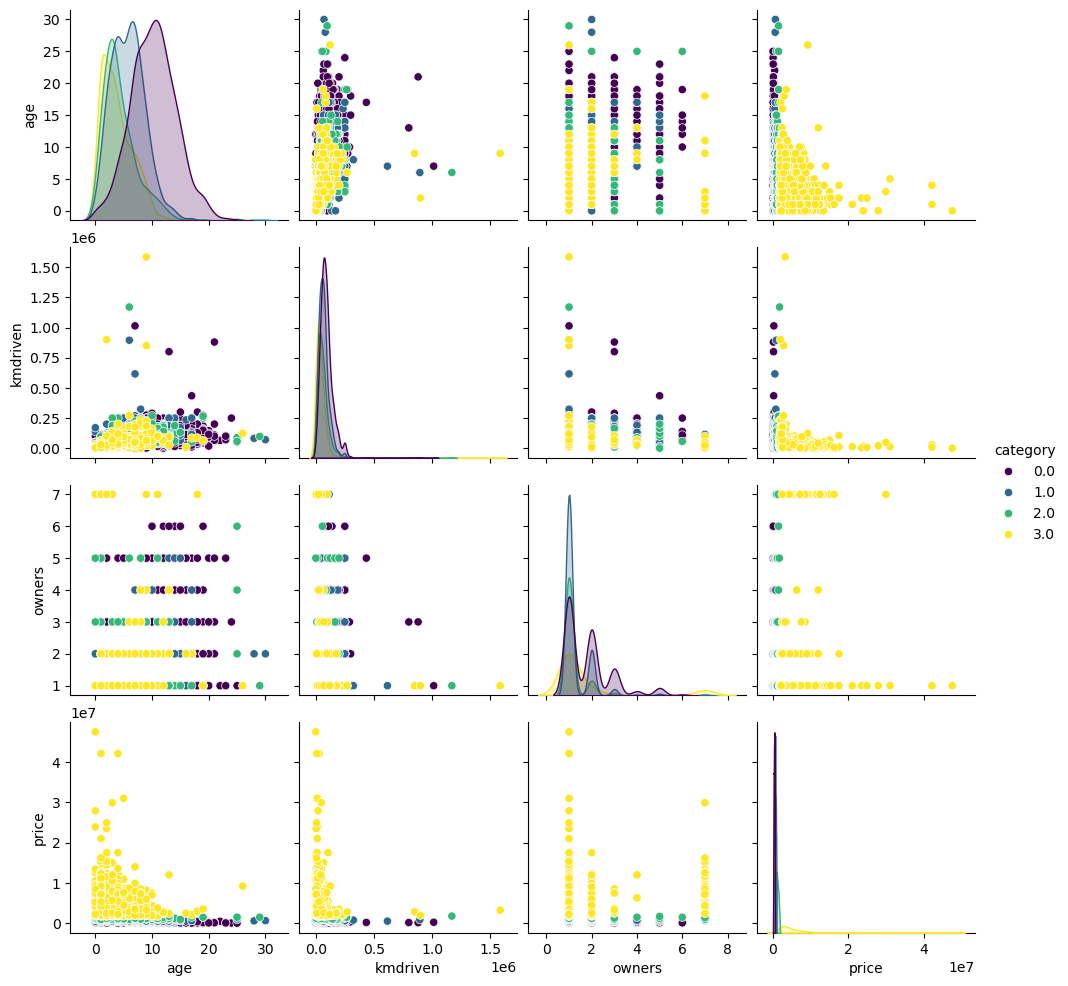

In [ ]:
sns.pairplot(data=ALLCARS_df[['age', 'kmdriven', 'owners', 'price', 'category']], hue="category", palette='viridis')

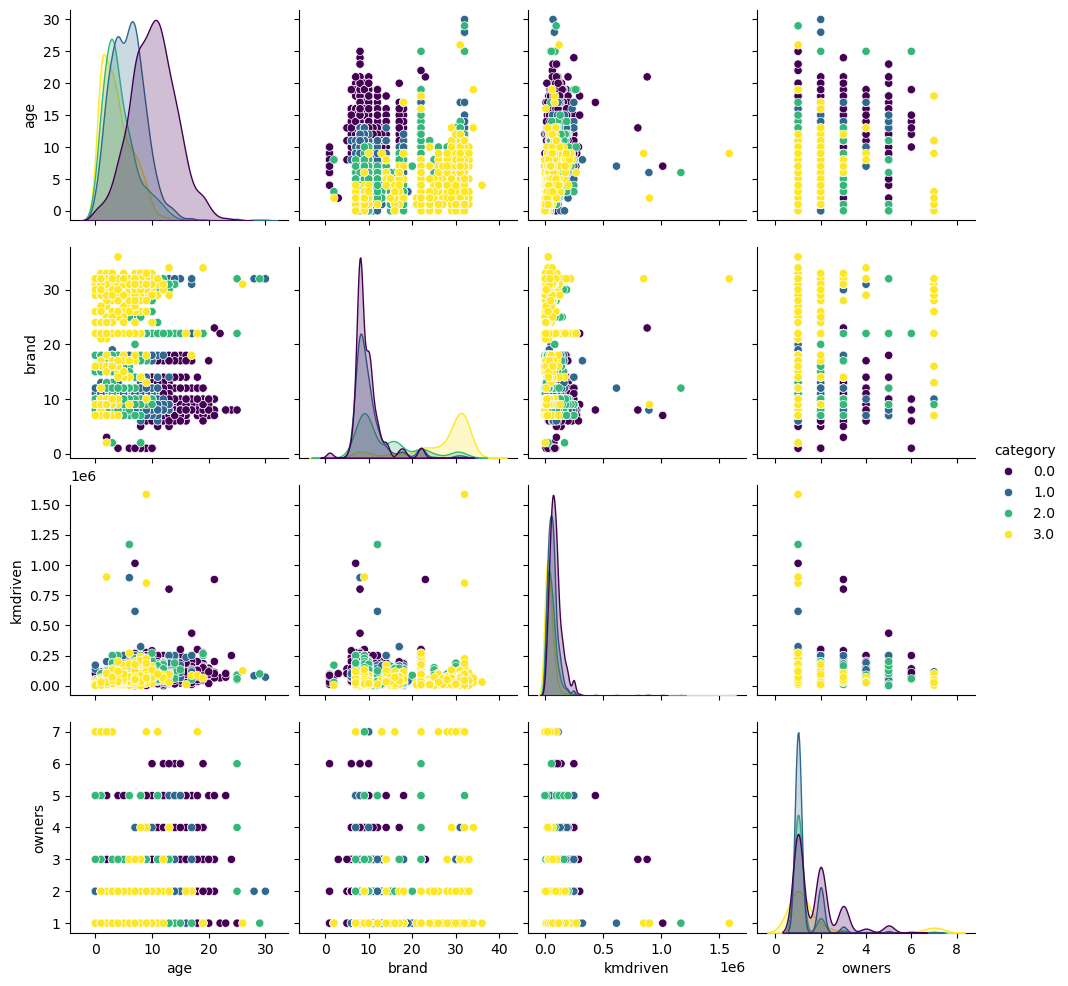

In [ ]:
sns.pairplot(data=ALLCARS_df[['age', 'brand', 'kmdriven', 'owners', 'category']], hue="category", palette='viridis')

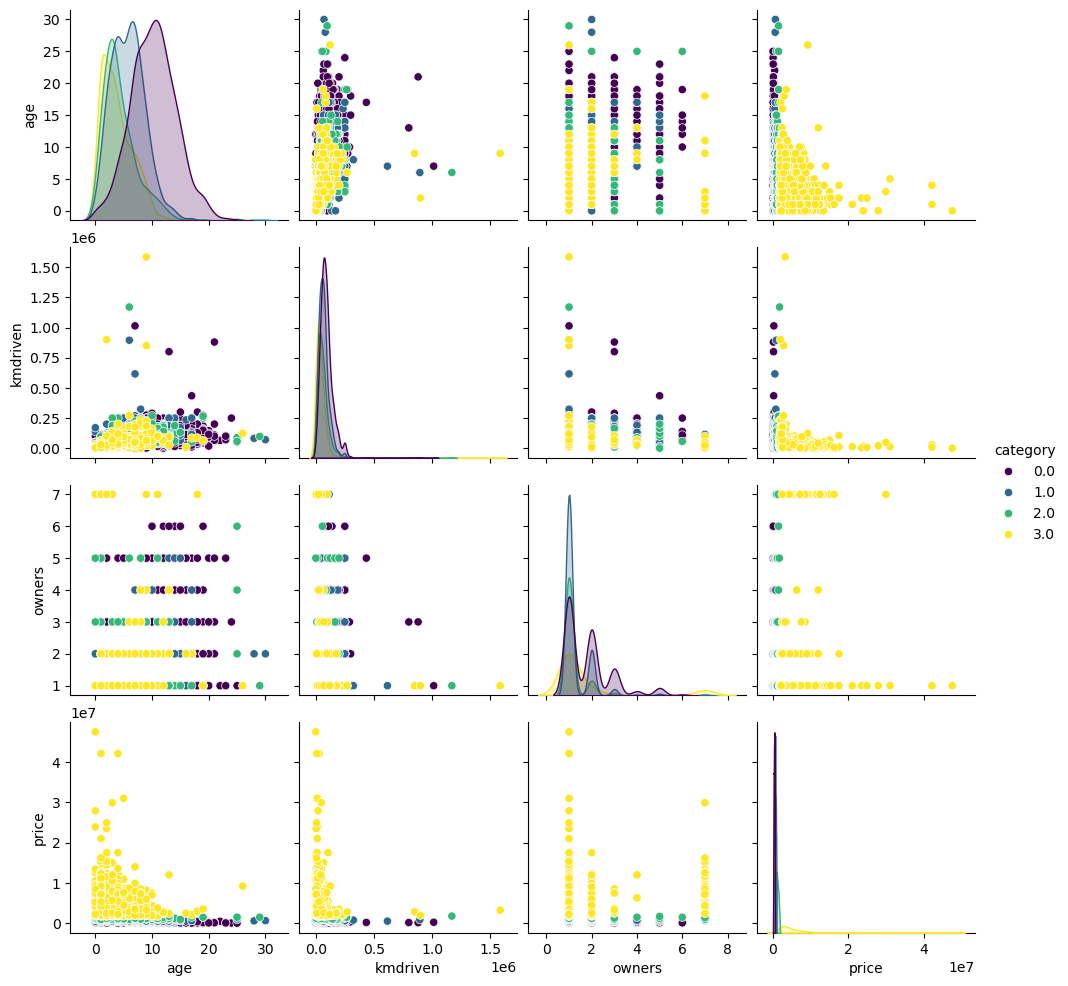

In [ ]:
sns.pairplot(data=ALLCARS_df[['age', 'kmdriven', 'owners', 'price', 'category']], hue="category", palette='viridis')

## Correlation heatmap
first let's see correlation matrix

In [ ]:
corr_matrix = ALLCARS_df.corr()
print(corr_matrix)

                   age     brand  kmdriven  fuelType  bodyType   seatCap  \
age           1.000000 -0.155790  0.441953 -0.019394 -0.192756 -0.096646   
brand        -0.155790  1.000000 -0.126529  0.271083  0.379828 -0.061012   
kmdriven      0.441953 -0.126529  1.000000  0.100615 -0.005685  0.086536   
fuelType     -0.019394  0.271083  0.100615  1.000000  0.369919  0.144854   
bodyType     -0.192756  0.379828 -0.005685  0.369919  1.000000  0.289760   
seatCap      -0.096646 -0.061012  0.086536  0.144854  0.289760  1.000000   
transmission -0.184522  0.683962 -0.141868  0.246093  0.309292 -0.097858   
owners        0.220739  0.100445  0.101736  0.061072  0.015921 -0.022889   
price        -0.341760  0.643939 -0.229772  0.292324  0.348505 -0.017693   
category     -0.563494  0.678922 -0.289120  0.288023  0.554919  0.107641   

              transmission    owners     price  category  
age              -0.184522  0.220739 -0.341760 -0.563494  
brand             0.683962  0.100445  0.64393

now let's see the heatmap

<Axes: >

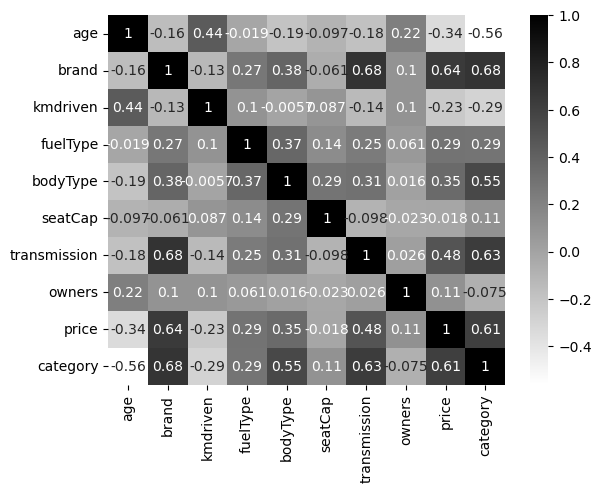

In [ ]:
sns.heatmap(data=corr_matrix, annot=True, cmap='binary')

so this is our data on which we need to train our model.  
from these we get following conclusions:
1. The dataset is divided into four categories: **cheap, bidget, midrange and luxury**.  
2. While the division of cars between four categories based on price seems well, the number of examples in each category are not balanced i.e., cheap/budget are more (1780, 1406 rep.) while midrange/luxury (957, 906 resp) is lesser.  
3. As expected, mean and median price increases rapidly between categories.  
4. Luxury and Midrange categories show much wider gaps between mean and median, suggesting skewed data due to very high value outliers (more in luxury segment).  
5. Cheap and Budget cars cluster tightly around lower price bands, showing stable pricing, while Midrange cars spread across a broader spectrum.  
6. Luxury cars have the highest variance.
7. finally, we would expect best accuracy in cheap and budget cars while accuracy will degrade from midrange to luxury category due to skewed data and also not much examples.